## DNN model using k-means and Homogeneity score 
*Summary:* In this notebook, we train a DNN model using the Homogeneity score to rank the features, and then select the features that score above 0.1.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("../dataset/UNSW_NB15_training-set.csv")
test = pd.read_csv("../dataset/UNSW_NB15_testing-set.csv")

In [74]:
from sklearn.preprocessing import MinMaxScaler

df = pd.concat([train, test]).reset_index(drop=True)
y_df = df['attack_cat']
y_df_dummies = pd.get_dummies(y_df)
df = df.drop(columns=['id', 'label', 'attack_cat'], axis=1)

# get numeric column names without label column
num_cols = df._get_numeric_data().columns

# subract numeric columns and 'attack_cat' column from all columns to get categorical columns 
cat_cols = list(set(df.columns) - set(num_cols))

print(f"Numerical features: {len(num_cols)}\nCategorical features: {len(cat_cols)}")

Numerical features: 39
Categorical features: 3


In [75]:
# label encoding for categorical features
df[cat_cols] = df[cat_cols].astype('category')
for cat in cat_cols:
    df[cat] = df[cat].cat.codes

y_df = y_df.astype('category').cat.codes
df[cat_cols]

,service,state,proto
0,0,5,119
1,0,5,119
2,0,5,119
3,0,5,119
4,0,5,119
...,...,...,...
257668,2,5,119
257669,0,4,113
257670,2,5,119
257671,2,5,119


In [78]:
# y_df = df.iloc[:, -2:-1]

# apply min-max scaler that scales the variables in the range [0-1]
scl = MinMaxScaler()
df = pd.DataFrame(scl.fit_transform(df), columns=df.columns)

(df.shape, y_df_dummies.shape)

((257673, 42), (257673, 10))

In [87]:
from sklearn.cluster import KMeans
from sklearn import metrics

X_df = df
true_labels = y_df.to_numpy().flatten().tolist()

n = len(X_df.columns)
HS = []

for i in range(n):
    c = KMeans(init='k-means++', n_init=10, n_clusters=10, random_state=42).fit_predict(X=X_df.iloc[:, i].to_frame())
    HS.append((i, metrics.homogeneity_score(true_labels, c)))


c:\Users\janba\anaconda3\envs\ktai\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
c:\Users\janba\anaconda3\envs\ktai\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
c:\Users\janba\anaconda3\envs\ktai\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
c:\Users\janba\anaconda3\envs\ktai\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due 

In [93]:
HS.sort(key=lambda x: x[1], reverse=True)
HS

[(2, 0.2768750943824372),
 (34, 0.27109539245999514),
 (31, 0.26840455032536437),
 (10, 0.25948064420829586),
 (9, 0.23642205253857246),
 (33, 0.2361395077080385),
 (40, 0.23468787043122932),
 (30, 0.22256246071963218),
 (32, 0.2167245933280385),
 (35, 0.21005535325051944),
 (27, 0.20682009783500332),
 (11, 0.19616924535142738),
 (3, 0.1861055695465157),
 (1, 0.1784242810116429),
 (39, 0.177853910870278),
 (8, 0.17603159097741836),
 (26, 0.16400777317522375),
 (19, 0.11751515173922225),
 (22, 0.11178339577672118),
 (21, 0.10269631302899102),
 (20, 0.10259214888609472),
 (12, 0.09646186521352008),
 (23, 0.09193077681201624),
 (25, 0.07887957408364173),
 (24, 0.06762818019849628),
 (0, 0.0660824717139018),
 (16, 0.04464147473832232),
 (5, 0.04216630739466409),
 (14, 0.036106324441655686),
 (17, 0.032906489455632286),
 (4, 0.03275095523667059),
 (7, 0.024101785064552243),
 (38, 0.022993945934405766),
 (18, 0.022886429789776643),
 (28, 0.02065963776468419),
 (15, 0.01366638540167971),
 (13

In [112]:
# filter by selecting all features with a HS-score of > 0.1, then map to get feature index
feature_indices = list(map(lambda x: x[0], filter(lambda x: x[1] > 0.1, HS)))

# select only the selected features by index
df = df.iloc[:, feature_indices]
df

,service,ct_dst_sport_ltm,ct_state_ttl,dttl,sttl,ct_src_dport_ltm,ct_srv_dst,ct_srv_src,ct_dst_ltm,ct_dst_src_ltm,...,sload,state,proto,ct_src_ltm,rate,smean,swin,dwin,dtcpb,stcpb
0,0.000000,0.000000,0.333333,0.000000,0.996078,0.000000,0.016393,0.016129,0.000000,0.015625,...,0.030121,0.5,0.901515,0.000000,0.090909,0.151351,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.333333,0.000000,0.996078,0.000000,0.016393,0.016129,0.000000,0.015625,...,0.147128,0.5,0.901515,0.000000,0.125000,0.579054,0.0,0.0,0.000000,0.000000
2,0.000000,0.000000,0.333333,0.000000,0.996078,0.000000,0.032787,0.032258,0.000000,0.031250,...,0.142685,0.5,0.901515,0.000000,0.200000,0.344595,0.0,0.0,0.000000,0.000000
3,0.000000,0.000000,0.333333,0.000000,0.996078,0.017241,0.032787,0.032258,0.017241,0.031250,...,0.100200,0.5,0.901515,0.016949,0.166667,0.287838,0.0,0.0,0.000000,0.000000
4,0.000000,0.000000,0.333333,0.000000,0.996078,0.017241,0.032787,0.032258,0.017241,0.031250,...,0.142017,0.5,0.901515,0.016949,0.100000,0.702027,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.166667,0.266667,0.333333,0.000000,0.996078,0.396552,0.377049,0.370968,0.396552,0.359375,...,0.008461,0.5,0.901515,0.389831,0.111111,0.022297,0.0,0.0,0.000000,0.000000
257669,0.000000,0.000000,0.166667,0.992126,0.996078,0.000000,0.000000,0.000000,0.000000,0.015625,...,0.000001,0.4,0.856061,0.000000,0.000034,0.025676,1.0,1.0,0.804002,0.819281
257670,0.166667,0.044444,0.333333,0.000000,0.996078,0.034483,0.180328,0.177419,0.034483,0.187500,...,0.008461,0.5,0.901515,0.033898,0.111111,0.022297,0.0,0.0,0.000000,0.000000
257671,0.166667,0.288889,0.333333,0.000000,0.996078,0.500000,0.475410,0.467742,0.500000,0.453125,...,0.008461,0.5,0.901515,0.491525,0.111111,0.022297,0.0,0.0,0.000000,0.000000


In [114]:
from sklearn.model_selection import train_test_split

y = y_df_dummies
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((172640, 21), (85033, 21), (172640, 10), (85033, 10))

# Tensorflow model

In [115]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
plt.style.use('ggplot')
!pip install livelossplot
from livelossplot import PlotLossesKeras

In [116]:
model = keras.Sequential(
    [
        layers.Dense(256, activation='relu', input_dim=X_train.shape[1]),
        layers.Dense(128, activation='relu', use_bias=True),
        layers.Dense(128, activation='relu', use_bias=True),
        layers.Dense(128, activation='relu', use_bias=True),
        layers.Dense(128, activation='relu', use_bias=True),
        layers.Dense(10, activation='softmax', use_bias=True)
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5632      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 89,354
Trainable params: 89,354
Non-traina

In [117]:
model.compile('adam', loss='categorical_crossentropy', metrics='accuracy')

monitor_val_acc = EarlyStopping(monitor='loss', patience=10)
callbacks=[PlotLossesKeras()]

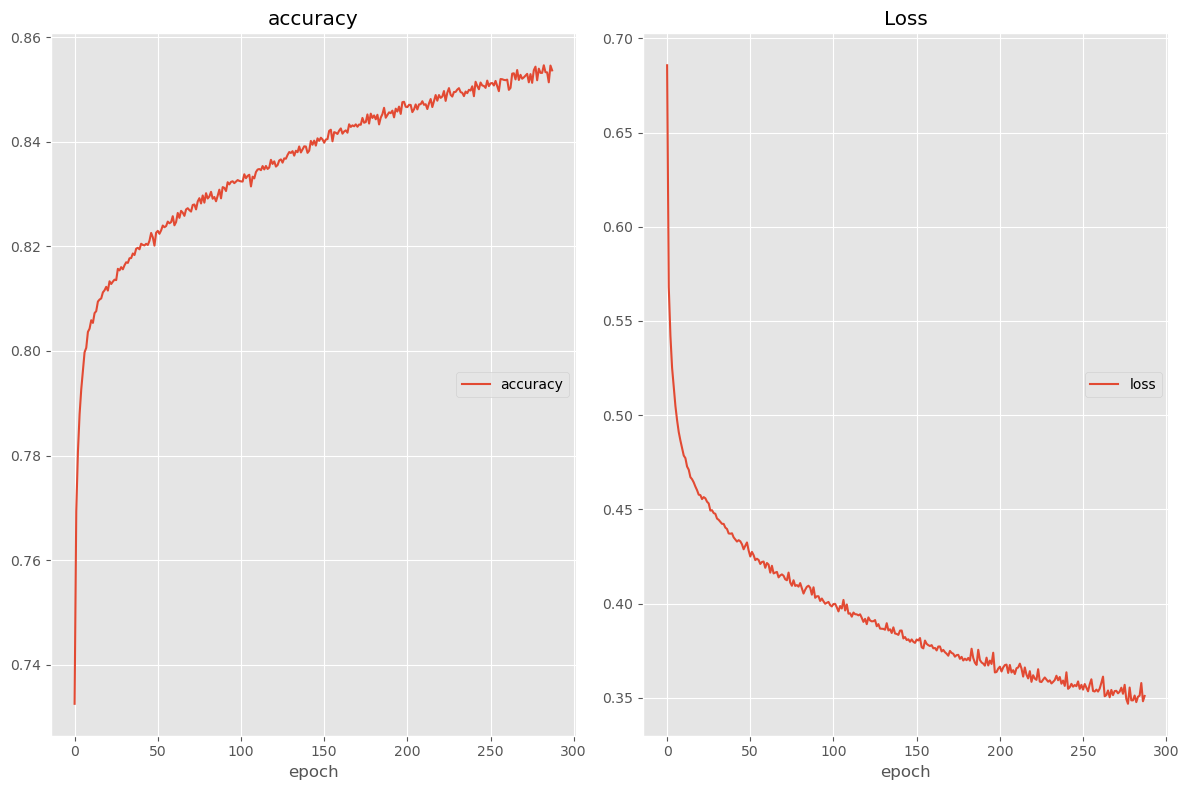

accuracy
	accuracy         	 (min:    0.733, max:    0.855, cur:    0.854)
Loss
	loss             	 (min:    0.347, max:    0.686, cur:    0.351)


In [118]:
model.fit(X_train, y_train, epochs=1000, batch_size=128, callbacks=[PlotLossesKeras(), monitor_val_acc], shuffle=1000, verbose=0)

In [119]:
model.evaluate(X_test, y_test)

2658/2658 [==============================] - 3s 1ms/step - loss: 0.6336 - accuracy: 0.8160


[0.633587658405304, 0.815989077091217]